In [21]:
#This example uses Python 2.7 and the python-request library.

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'ebd60abd-428e-4f5b-87f7-6f8a209978fc',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data

{'status': {'timestamp': '2024-07-05T18:48:25.634Z', 'error_code': 0, 'error_message': None, 'elapsed': 21, 'credit_count': 1, 'notice': None, 'total_count': 10030}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11592, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [2]:
type(data)

dict

In [3]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
#This normalizes the data and makes it all pretty in a dataframe
df = pd.json_normalize(data['data'])
df['timestamp']=pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11592,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.971952e+07,1.971952e+07,False,NaN,1,NaN,NaN,None,2024-07-05T18:32:00.000Z,56557.986270,5.670160e+10,40.0474,-0.592434,-3.000591,-6.788063,-20.507502,-10.216671,-17.187328,1.115296e+12,54.0920,1.187718e+12,None,2024-07-05T18:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-05 12:33:30.401331
1,1027,Ethereum,ETH,ethereum,9121,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201968e+08,1.201968e+08,True,NaN,2,NaN,NaN,None,2024-07-05T18:31:00.000Z,2982.742669,3.195471e+10,54.3913,-0.115529,-4.963516,-11.697844,-22.697082,-2.737915,-10.906087,3.585163e+11,17.4257,3.585163e+11,None,2024-07-05T18:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-05 12:33:30.401331
2,825,Tether USDt,USDT,tether,91073,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.123013e+11,1.160769e+11,True,NaN,3,NaN,NaN,None,2024-07-05T18:31:00.000Z,0.999987,1.065927e+11,42.3705,0.000938,0.074272,0.157833,0.018718,-0.055079,-0.027486,1.122999e+11,5.4583,1.160754e+11,None,2024-07-05T18:31:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-07-05 12:33:30.401331
3,1839,BNB,BNB,bnb,2190,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.475828e+08,1.475828e+08,False,NaN,4,NaN,NaN,None,2024-07-05T18:31:00.000Z,496.018214,2.901157e+09,41.9349,-0.344831,-5.277703,-13.085613,-28.886604,-15.729477,-15.170246,7.320377e+10,3.5504,7.320377e+10,None,2024-07-05T18:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-05 12:33:30.401331
4,5426,Solana,SOL,solana,699,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.628837e+08,5.795310e+08,True,NaN,5,NaN,NaN,None,2024-07-05T18:31:00.000Z,134.920023,4.905438e+09,51.4691,-0.056115,0.548118,-4.635412,-22.288438,-11.254224,-23.979185,6.245228e+10,3.0355,7.819034e+10,None,2024-07-05T18:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-05 12:33:30.401331
5,3408,USDC,USDC,usd-coin,20835,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.320674e+10,3.320674e+10,False,NaN,6,NaN,NaN,None,2024-07-05T18:31:00.000Z,0.999960,1.058256e+10,49.2612,-0.010550,-0.004518,0.000027,0.002490,-0.047188,-0.001610,3.320542e+10,1.6140,3.320542e+10,None,2024-07-05T18:31:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-07-05 12:33:30.401331
6,52,XRP,XRP,xrp,1351,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.572306e+10,9.998747e+10,False,NaN,7,NaN,NaN,None,2024-07-05T18:32:00.000Z,0.424919,2.197869e+09,40.4321,-0.011073,-2.982420,-10.139106,-19.354581,-22.219461,-28.083276,2.367777e+10,1.1476,4.249187e+10,None,2024-07-05T18:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-05 12:33:30.401331
7,11419,Toncoin,TON,toncoin,451,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2.501224e+09,5.108570e+09,True,NaN,8,3.414167e+09,2.482315e+10,None,2024-07-05T18:31:00.000Z,7.270633,7.556484e+08,42.4803,-0.326174,1.060205,-2.969764,-2.409873,24.143754,33.377567,1.818548e+10,0.8812,3.714254e+10,None,2024-07-05T18:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-05 12:33:30.401331
8,74,Dogecoin,DOGE,dogecoin,1021,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, me

In [38]:

def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'ebd60abd-428e-4f5b-87f7-6f8a209978fc',
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    df_append = pd.DataFrame(df2)
    df = pd.concat([df,df_append])


     # Use this if you want to create a csv and append data to it
    #df = pd.json_normalize(data['data'])
    #df['timestamp'] = pd.to_datetime('now')
    #df

    #if not os.path.isfile(r'C:\Users\minhk\Downloads\API Runner\API.csv'):
        #df.to_csv(r'C:\Users\minhk\Downloads\API Runner\API.csv',header='column_names')
    #else:
        #df.to_csv(r'C:\Users\minhk\Downloads\API Runner\API.csv',mode='a',header=False) #a stand for append


In [40]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 min
exit()

{'status': {'timestamp': '2024-07-05T19:04:50.272Z', 'error_code': 0, 'error_message': None, 'elapsed': 35, 'credit_count': 1, 'notice': None, 'total_count': 10030}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11592, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

KeyboardInterrupt: 

In [44]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [46]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,1,Bitcoin,BTC,bitcoin,11592,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19719521.00000,19719521.00000,False,NaN,1,NaN,NaN,None,2024-07-05T18:57:00.000Z,56587.44911,56999126231.35725,40.10900,0.09168,-2.60166,-6.82686,-20.43723,-10.78727,-17.18194,1115877390972.97021,53.98130,1188336431216.16992,None,2024-07-05T18:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-05 12:59:00.001853,NaT
1,1027,Ethereum,ETH,ethereum,9121,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120196847.99400,120196847.99400,True,NaN,2,NaN,NaN,None,2024-07-05T18:57:00.000Z,2991.04877,32029638778.92655,54.62360,-0.05004,-4.40259,-11.48627,-22.28791,-2.82779,-10.60918,359514634117.92920,17.37680,359514634117.92999,None,2024-07-05T18:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-05 12:59:00.001853,NaT
2,825,Tether USDt,USDT,tether,91073,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,112301290554.47960,116076856617.27618,True,NaN,3,NaN,NaN,None,2024-07-05T18:57:00.000Z,0.99998,106997427828.81114,42.55790,-0.01756,0.06569,0.15282,0.00648,-0.00035,-0.02601,112298742096.38290,5.42780,116074222480.09000,None,2024-07-05T18:57:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-07-05 12:59:00.001853,NaT
3,1839,BNB,BNB,bnb,2190,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,147582825.83886,147582825.83886,False,NaN,4,NaN,NaN,None,2024-07-05T18:57:00.000Z,497.59843,2910855280.66834,42.19890,-0.14373,-4.93437,-12.81555,-28.17002,-15.76243,-14.74404,73436982148.85222,3.55260,73436982148.85001,None,2024-07-05T18:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-05 12:59:00.001853,NaT
4,5426,Solana,SOL,solana,699,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,462883584.77603,579530848.61470,True,NaN,5,NaN,NaN,None,2024-07-05T18:57:00.000Z,135.82051,4923537995.74394,51.93740,0.57800,1.29946,-3.96393,-21.57338,-11.30715,-23.35430,62869083416.70900,3.03870,78712173994.55000,None,2024-07-05T18:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-05 12:59:00.001853,NaT
5,3408,USDC,USDC,usd-coin,20835,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,33206743317.82314,33206743317.82314,False,NaN,6,NaN,NaN,None,2024-07-05T18:57:00.000Z,0.99991,10623537832.06875,49.57250,-0.02983,-0.01833,-0.00667,-0.00892,-0.00836,-0.00015,33203874384.42315,1.60490,33203874384.42000,None,2024-07-05T18:57:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-07-05 12:59:00.001853,NaT
6,52,XRP,XRP,xrp,1351,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,55723063839.00000,99987471767.00000,False,NaN,7,NaN,NaN,None,2024-07-05T18:58:00.000Z,0.42700,2198656273.66847,39.59460,0.26008,-2.78559,-9.71734,-18.89844,-22.23543,-27.71957,23793488911.81226,1.15000,42699534577.92000,None,2024-07-05T18:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-05 12:59:00.001853,NaT
7,11419,Toncoin,TON,toncoin,451,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2501223758.32953,5108569843.91200,True,NaN,8,3414166606.00000,24833253811.59686,None,2024-07-05T18:57:00.000Z,7.27359,756032711.59335,41.78460,0.11223,1.30800,-2.91055,-1.68656,23.91683,33.18253

In [52]:
df3=df.groupby('name', sort = False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3 #dataframetype

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.06464,-2.91704,-6.98663,-20.62096,-10.85702,-17.36747
Ethereum,0.03576,-4.37952,-11.46602,-22.31747,-2.65434,-10.62929
Tether USDt,-0.02154,0.06985,0.15741,0.00554,-0.00202,-0.01283
BNB,-0.09212,-5.03543,-12.83240,-28.07919,-15.72471,-14.75321
Solana,0.32666,1.07210,-4.13798,-21.78264,-11.34275,-23.51407
USDC,-0.02819,-0.00825,0.00316,-0.00972,-0.00827,0.00983
XRP,0.15593,-2.94048,-9.81916,-18.97361,-22.11299,-27.73389
Toncoin,0.02877,1.33165,-2.97968,-1.66864,24.29129,33.27152
Dogecoin,0.38032,-2.66844,-15.23609,-35.75200,-32.66237,-42.60148


In [54]:
df4=df3.stack()
df4 #Seriestypechange

name                                     
Bitcoin      quote.USD.percent_change_1h      0.06464
             quote.USD.percent_change_24h    -2.91704
             quote.USD.percent_change_7d     -6.98663
             quote.USD.percent_change_30d   -20.62096
             quote.USD.percent_change_60d   -10.85702
             quote.USD.percent_change_90d   -17.36747
Ethereum     quote.USD.percent_change_1h      0.03576
             quote.USD.percent_change_24h    -4.37952
             quote.USD.percent_change_7d    -11.46602
             quote.USD.percent_change_30d   -22.31747
             quote.USD.percent_change_60d    -2.65434
             quote.USD.percent_change_90d   -10.62929
Tether USDt  quote.USD.percent_change_1h     -0.02154
             quote.USD.percent_change_24h     0.06985
             quote.USD.percent_change_7d      0.15741
             quote.USD.percent_change_30d     0.00554
             quote.USD.percent_change_60d    -0.00202
             quote.USD.percent_change_90

In [56]:
df5 = df4.to_frame(name='values')
df5 #Changeseriestoframe

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.06464
            quote.USD.percent_change_24h  -2.91704
            quote.USD.percent_change_7d   -6.98663
            quote.USD.percent_change_30d -20.62096
            quote.USD.percent_change_60d -10.85702
            quote.USD.percent_change_90d -17.36747
Ethereum    quote.USD.percent_change_1h    0.03576
            quote.USD.percent_change_24h  -4.37952
            quote.USD.percent_change_7d  -11.46602
            quote.USD.percent_change_30d -22.31747
            quote.USD.percent_change_60d  -2.65434
            quote.USD.percent_change_90d -10.62929
Tether USDt quote.USD.percent_change_1h   -0.02154
            quote.USD.percent_change_24h   0.06985
            quote.USD.percent_change_7d    0.15741
            quote.USD.percent_change_30d   0.00554
            quote.USD.percent_change_60d  -0.00202
            quote.USD.percent_change_90d  -0.01283
BNB         quote.USD.percent_change_1h   -0.09212
            quote.USD.percent_change_24h  -5.03543
            quote.USD.percent_change_7d  -12.83240
            quote.USD.percent_change_30d -28.07919
            quote.USD.percent_change_60d -15.72471
            quote.USD.percent_change_90d -14.75321
Solana      quote.USD.percent_change_1h    0.32666
            quote.USD.percent_change_24h   1.07210
            quote.USD.percent_change_7d   -4.13798
            quote.USD.percent_change_30d -21.78264
            quote.USD.percent_change_60d -11.34275
            quote.USD.percent_change_90d -23.51407
USDC        quote.USD.percent_change_1h   -0.02819
            quote.USD.percent_change_24h  -0.00825
            quote.USD.percent_change_7d    0.00316
            quote.USD.percent_change_30d  -0.00972
            quote.USD.percent_change_60d  -0.00827
            quote.USD.percent_change_90d   0.00983
XRP         quote.USD.percent_change_1h    0.15593
            quote.USD.percent_change_24h  -2.94048
            quote.USD.percent_change_7d   -9.81916
            quote.USD.percent_change_30d -18.97361
            quote.USD.percent_change_60d -22.11299
            quote.USD.percent_change_90d -27.73389
Toncoin     quote.USD.percent_change_1h    0.02877
            quote.USD.percent_change_24h   1.33165
            quote.USD.percent_change_7d   -2.97968
            quote.USD.percent_change_30d  -1.66864
            quote.USD.percent_change_60d  24.29129
            quote.USD.percent_change_90d  33.27152
Dogecoin    quote.USD.percent_change_1h    0.38032
            quote.USD.percent_change_24h  -2.66844
            quote.USD.percent_change_7d  -15.23609
            quote.USD.percent_change_30d -35.75200
            quote.USD.percent_change_60d -32.66237
            quote.USD.percent_change_90d -42.60148
Cardano     quote.USD.percent_change_1h    0.56120
            quote.USD.percent_change_24h  -6.19320
            quote.USD.percent_change_7d   -9.83667
            quote.USD.percent_change_30d -23.25026
            quote.USD.percent_change_60d -23.43351
            quote.USD.percent_change_90d -39.24917
TRON        quote.USD.percent_change_1h    0.24960
            quote.USD.percent_change_24h   0.00444
            quote.USD.percent_change_7d    2.96768
            quote.USD.percent_change_30d  10.82153
            quote.USD.percent_change_60d   6.79469
            quote.USD.percent_change_90d   6.38495
Avalanche   quote.USD.percent_change_1h    0.44843
            quote.USD.percent_change_24h  -1.44850
            quote.USD.percent_change_7d  -10.70627
            quote.USD.percent_change_30d -31.67621
            quote.USD.percent_change_60d -32.66385
            quote.USD.percent_change_90d -47.78331
Shiba Inu   quote.USD.percent_change_1h   -0.20391
            quote.USD.percent_change_24h  -3.49484
            quote.USD.percent_change_7d  -14.15778
            quote.USD.percent_change_30d -43.54927
            quote.USD.percent_change_60d -39.42133
            quo

In [60]:
df5.count()

values    90
dtype: int64

In [64]:
index=pd.Index(range(90))

df6=df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.06464
1,Bitcoin,quote.USD.percent_change_24h,-2.91704
2,Bitcoin,quote.USD.percent_change_7d,-6.98663
3,Bitcoin,quote.USD.percent_change_30d,-20.62096
4,Bitcoin,quote.USD.percent_change_60d,-10.85702
5,Bitcoin,quote.USD.percent_change_90d,-17.36747
6,Ethereum,quote.USD.percent_change_1h,0.03576
7,Ethereum,quote.USD.percent_change_24h,-4.37952
8,Ethereum,quote.USD.percent_change_7d,-11.46602
9,Ethereum,quote.USD.percent_change_30d,-22.31747


In [66]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.06464
1,Bitcoin,quote.USD.percent_change_24h,-2.91704
2,Bitcoin,quote.USD.percent_change_7d,-6.98663
3,Bitcoin,quote.USD.percent_change_30d,-20.62096
4,Bitcoin,quote.USD.percent_change_60d,-10.85702
5,Bitcoin,quote.USD.percent_change_90d,-17.36747
6,Ethereum,quote.USD.percent_change_1h,0.03576
7,Ethereum,quote.USD.percent_change_24h,-4.37952
8,Ethereum,quote.USD.percent_change_7d,-11.46602
9,Ethereum,quote.USD.percent_change_30d,-22.31747


In [78]:
df7['percent_change']=df7['percent_change'].replace(['quote.USD.percent_change_1h'],['1h'])
df7['percent_change']=df7['percent_change'].replace(['quote.USD.percent_change_24h'],['24h'])
df7['percent_change']=df7['percent_change'].replace(['quote.USD.percent_change_7d'],['7d'])
df7['percent_change']=df7['percent_change'].replace(['quote.USD.percent_change_30d'],['30d'])
df7['percent_change']=df7['percent_change'].replace(['quote.USD.percent_change_60d'],['60d'])
df7['percent_change']=df7['percent_change'].replace(['quote.USD.percent_change_90d'],['90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.06464
1,Bitcoin,24h,-2.91704
2,Bitcoin,7d,-6.98663
3,Bitcoin,30d,-20.62096
4,Bitcoin,60d,-10.85702
5,Bitcoin,90d,-17.36747
6,Ethereum,1h,0.03576
7,Ethereum,24h,-4.37952
8,Ethereum,7d,-11.46602
9,Ethereum,30d,-22.31747


In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

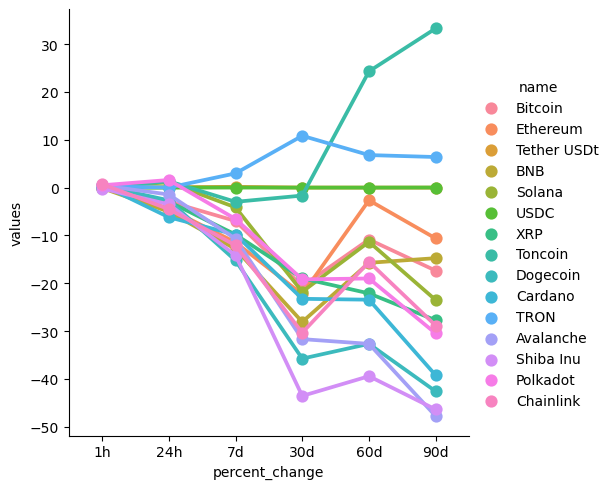

In [80]:
sns.catplot(x='percent_change',y='values',hue='name',data=df7,kind='point')

In [100]:
#create a dataframe with the columns we want


#df8 = df[['name','quote.USD.price','timestamp']]
#df8 = df8.query("name == 'Bitcoin'")
#df8

In [102]:
#sns.set_theme(style='darkgrid')
#sns.lineplot(x='timestamp',y='quote.USD.price',data=df8)